Vadar bag of words Snetimental Analysis

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# prompt: change directory to current python notebooks on Google drive
import os
os.chdir('/content/drive/MyDrive/Courses/Ryerson/MRP/Dataset')

In [ ]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger_eng')
import string


import matplotlib.pyplot as plt
import seaborn as sns

# stylesheet for plots
plt.style.use('ggplot')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


In [ ]:
tester = {'Accuracy': 0.6978764478764479,
 'F1': 0.6521173224896758,
 'Precision': 0.6643640206049398,
 'Recall': 0.6444244186450209}

In [ ]:
# biobert_metric_df = xgb_metrics_df[]
xgb_metrics_df.loc['BioBertModel'] = [tester['Accuracy'], tester['F1'], tester['Precision'], tester['Recall']]
# pd.DataFrame(tester, index=['XGBClassifier'], columns=['Accuracy', 'F1', 'Precision', 'Recall'])

In [ ]:
nltk.download('stopwords')
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger_eng')
nltk.download('maxent_ne_chunker_tab')
nltk.download('words')
nltk.download('vader_lexicon')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker_tab to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker_tab.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

# Load Data

In [ ]:
# df = pd.read_csv('GOOGL.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'GOOGL.csv'

In [ ]:
# df.head()

,Unnamed: 0,MT_001,MT_002,MT_003,MT_004,MT_005,MT_006,MT_007,MT_008,MT_009,...,MT_361,MT_362,MT_363,MT_364,MT_365,MT_366,MT_367,MT_368,MT_369,MT_370
0,2011-01-01 00:15:00,0,0,0,0,0,0,0,0,0,...,0,0.0,0,0,0,0,0,0,0,0
1,2011-01-01 00:30:00,0,0,0,0,0,0,0,0,0,...,0,0.0,0,0,0,0,0,0,0,0
2,2011-01-01 00:45:00,0,0,0,0,0,0,0,0,0,...,0,0.0,0,0,0,0,0,0,0,0
3,2011-01-01 01:00:00,0,0,0,0,0,0,0,0,0,...,0,0.0,0,0,0,0,0,0,0,0
4,2011-01-01 01:15:00,0,0,0,0,0,0,0,0,0,...,0,0.0,0,0,0,0,0,0,0,0


In [ ]:
# df = pd.read_excel('ugo_manual_raw.xlsx', index_col=0)
df = pd.read_csv('drugLibTrain_raw.tsv', sep='\t')
df = df.rename(columns={'Unnamed: 0': 'url_id'})
df = df.reset_index().rename(columns={'index': 'id'})
# side_effect_vader_score.rename(columns={"neg": "sd_neg"
df.head()

,id,url_id,urlDrugName,rating,effectiveness,sideEffects,condition,benefitsReview,sideEffectsReview,commentsReview
0,0,2202,enalapril,4,Highly Effective,Mild Side Effects,management of congestive heart failure,slowed the progression of left ventricular dys...,"cough, hypotension , proteinuria, impotence , ...","monitor blood pressure , weight and asses for ..."
1,1,3117,ortho-tri-cyclen,1,Highly Effective,Severe Side Effects,birth prevention,Although this type of birth control has more c...,"Heavy Cycle, Cramps, Hot Flashes, Fatigue, Lon...","I Hate This Birth Control, I Would Not Suggest..."
2,2,1146,ponstel,10,Highly Effective,No Side Effects,menstrual cramps,I was used to having cramps so badly that they...,Heavier bleeding and clotting than normal.,I took 2 pills at the onset of my menstrual cr...
3,3,3947,prilosec,3,Marginally Effective,Mild Side Effects,acid reflux,The acid reflux went away for a few months aft...,"Constipation, dry mouth and some mild dizzines...",I was given Prilosec prescription at a dose of...
4,4,1951,lyrica,2,Marginally Effective,Severe Side Effects,fibromyalgia,I think that the Lyrica was starting to help w...,I felt extremely drugged and dopey. Could not...,See above


In [ ]:
# df = pd.read_excel('ugo_manual_raw.xlsx', index_col=0)
test_df = pd.read_csv('drugLibTest_raw.tsv', sep='\t')
test_df = test_df.rename(columns={'Unnamed: 0': 'url_id'})
test_df = test_df.reset_index().rename(columns={'index': 'id'})
# side_effect_vader_score.rename(columns={"neg": "sd_neg"
test_df.head()

,id,url_id,urlDrugName,rating,effectiveness,sideEffects,condition,benefitsReview,sideEffectsReview,commentsReview
0,0,1366,biaxin,9,Considerably Effective,Mild Side Effects,sinus infection,The antibiotic may have destroyed bacteria cau...,"Some back pain, some nauseau.",Took the antibiotics for 14 days. Sinus infect...
1,1,3724,lamictal,9,Highly Effective,Mild Side Effects,bipolar disorder,Lamictal stabilized my serious mood swings. On...,"Drowsiness, a bit of mental numbness. If you t...",Severe mood swings between hypomania and depre...
2,2,3824,depakene,4,Moderately Effective,Severe Side Effects,bipolar disorder,Initial benefits were comparable to the brand ...,"Depakene has a very thin coating, which caused...",Depakote was prescribed to me by a Kaiser psyc...
3,3,969,sarafem,10,Highly Effective,No Side Effects,bi-polar / anxiety,It controlls my mood swings. It helps me think...,I didnt really notice any side effects.,This drug may not be for everyone but its wond...
4,4,696,accutane,10,Highly Effective,Mild Side Effects,nodular acne,Within one week of treatment superficial acne ...,Side effects included moderate to severe dry s...,Drug was taken in gelatin tablet at 0.5 mg per...


Plot the counts of reviews

# BASIC NLTK and Visualization

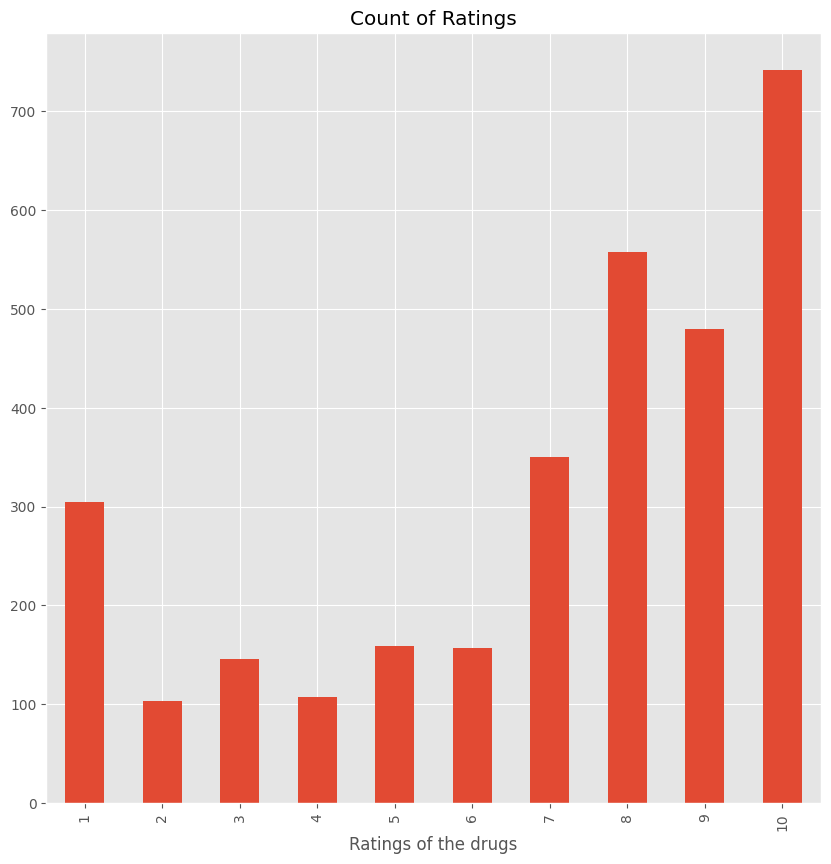

In [ ]:
ax = df['rating'].value_counts().sort_index() \
  .plot(kind='bar',
        title='Count of Ratings',
        figsize=(10,10))
ax.set_xlabel('Ratings of the drugs')
plt.show()

**BASIC NLTK**

NLTK Tokenizer

In [ ]:
example = df['sideEffectsReview'][500]
# nltk.word_tokenize(example)
example

'had trouble losing too much weight at first. but that levels off after a while. had problems sleeping when the dose was increased too quickly. i have to make sure i take the full amount for the day at least before 12 noon or i will have trouble sleeping that night. sometimes i get shaky/nervous, dry mouth, feel dehydrated.'

In [ ]:
tokens = nltk.word_tokenize(example)

In [ ]:
tagged = nltk.pos_tag(tokens)
tagged

[('had', 'VBD'),
 ('trouble', 'NN'),
 ('losing', 'VBG'),
 ('too', 'RB'),
 ('much', 'JJ'),
 ('weight', 'NN'),
 ('at', 'IN'),
 ('first', 'JJ'),
 ('.', '.'),
 ('but', 'CC'),
 ('that', 'IN'),
 ('levels', 'NNS'),
 ('off', 'IN'),
 ('after', 'IN'),
 ('a', 'DT'),
 ('while', 'NN'),
 ('.', '.'),
 ('had', 'VBD'),
 ('problems', 'NNS'),
 ('sleeping', 'VBG'),
 ('when', 'WRB'),
 ('the', 'DT'),
 ('dose', 'NN'),
 ('was', 'VBD'),
 ('increased', 'VBN'),
 ('too', 'RB'),
 ('quickly', 'RB'),
 ('.', '.'),
 ('i', 'NNS'),
 ('have', 'VBP'),
 ('to', 'TO'),
 ('make', 'VB'),
 ('sure', 'JJ'),
 ('i', 'NNS'),
 ('take', 'VBP'),
 ('the', 'DT'),
 ('full', 'JJ'),
 ('amount', 'NN'),
 ('for', 'IN'),
 ('the', 'DT'),
 ('day', 'NN'),
 ('at', 'IN'),
 ('least', 'JJS'),
 ('before', 'IN'),
 ('12', 'CD'),
 ('noon', 'NN'),
 ('or', 'CC'),
 ('i', 'NN'),
 ('will', 'MD'),
 ('have', 'VB'),
 ('trouble', 'NN'),
 ('sleeping', 'VBG'),
 ('that', 'DT'),
 ('night', 'NN'),
 ('.', '.'),
 ('sometimes', 'RB'),
 ('i', 'JJ'),
 ('get', 'VBP'),
 ('sha

In [ ]:
entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()

(S
  had/VBD
  trouble/NN
  losing/VBG
  too/RB
  much/JJ
  weight/NN
  at/IN
  first/JJ
  ./.
  but/CC
  that/IN
  levels/NNS
  off/IN
  after/IN
  a/DT
  while/NN
  ./.
  had/VBD
  problems/NNS
  sleeping/VBG
  when/WRB
  the/DT
  dose/NN
  was/VBD
  increased/VBN
  too/RB
  quickly/RB
  ./.
  i/NNS
  have/VBP
  to/TO
  make/VB
  sure/JJ
  i/NNS
  take/VBP
  the/DT
  full/JJ
  amount/NN
  for/IN
  the/DT
  day/NN
  at/IN
  least/JJS
  before/IN
  12/CD
  noon/NN
  or/CC
  i/NN
  will/MD
  have/VB
  trouble/NN
  sleeping/VBG
  that/DT
  night/NN
  ./.
  sometimes/RB
  i/JJ
  get/VBP
  shaky/nervous/JJ
  ,/,
  dry/JJ
  mouth/NN
  ,/,
  feel/NN
  dehydrated/VBD
  ./.)


**Preprocess**

# Preprocessing

In [ ]:
print(bool(re.search(r"[a-zA-Z0-9]", '---')))
print(re.search(r"[a-zA-Z0-9]", 'a---'))
print(re.search(r"[a-zA-Z0-9]", 'a---o'))

False
<re.Match object; span=(0, 1), match='a'>
<re.Match object; span=(0, 1), match='a'>


In [ ]:
print(df['sideEffects'].unique())
print(df['effectiveness'].unique())

['Mild Side Effects' 'Severe Side Effects' 'No Side Effects'
 'Extremely Severe Side Effects' 'Moderate Side Effects']
['Highly Effective' 'Marginally Effective' 'Ineffective'
 'Considerably Effective' 'Moderately Effective']


In [ ]:
df.head()

,id,url_id,urlDrugName,rating,effectiveness,sideEffects,condition,benefitsReview,sideEffectsReview,commentsReview
0,0,2202,enalapril,4,Highly Effective,Mild Side Effects,management of congestive heart failure,slowed the progression of left ventricular dys...,"cough, hypotension , proteinuria, impotence , ...","monitor blood pressure , weight and asses for ..."
1,1,3117,ortho-tri-cyclen,1,Highly Effective,Severe Side Effects,birth prevention,Although this type of birth control has more c...,"Heavy Cycle, Cramps, Hot Flashes, Fatigue, Lon...","I Hate This Birth Control, I Would Not Suggest..."
2,2,1146,ponstel,10,Highly Effective,No Side Effects,menstrual cramps,I was used to having cramps so badly that they...,Heavier bleeding and clotting than normal.,I took 2 pills at the onset of my menstrual cr...
3,3,3947,prilosec,3,Marginally Effective,Mild Side Effects,acid reflux,The acid reflux went away for a few months aft...,"Constipation, dry mouth and some mild dizzines...",I was given Prilosec prescription at a dose of...
4,4,1951,lyrica,2,Marginally Effective,Severe Side Effects,fibromyalgia,I think that the Lyrica was starting to help w...,I felt extremely drugged and dopey. Could not...,See above


Convert effectiveness and sideEffects to numerical values

In [ ]:

df['effectiveness_label'] = df['effectiveness'].map({'Highly Effective': 4, 'Considerably Effective': 3, 'Moderately Effective': 2, 'Marginally Effective': 1, 'Ineffective': 0})

df['sideEffects_label'] = df['sideEffects'].map({'No Side Effects': 4, 'Mild Side Effects': 3, 'Moderate Side Effects': 2,'Severe Side Effects': 1, 'Extremely Severe Side Effects': 0})

In [ ]:
df['rating'] = df['rating'] - 1

In [ ]:

test_df['effectiveness_label'] = test_df['effectiveness'].map({'Highly Effective': 4, 'Considerably Effective': 3, 'Moderately Effective': 2, 'Marginally Effective': 1, 'Ineffective': 0})

test_df['sideEffects_label'] = test_df['sideEffects'].map({'No Side Effects': 4, 'Mild Side Effects': 3, 'Moderate Side Effects': 2,'Severe Side Effects': 1, 'Extremely Severe Side Effects': 0})

In [ ]:
test_df['rating'] = test_df['rating'] - 1

In [ ]:
# Function to categorize ratings into sentiment labels
def label_sentiment(row):
    if row['rating'] >= 7:
      return "Positive"
    elif row['rating'] >= 4 and row['rating'] < 7:
      return "Neutral"
    elif row['rating'] >= 0 and row['rating'] < 4:
      return "Negative"
sentiment_map = {"Negative": 0, "Neutral": 1, "Positive": 2}
df["label_sentiment_name"] = df.apply(label_sentiment, axis=1)
df["label_sentiment"] = df['label_sentiment_name'].map(sentiment_map)

test_df["label_sentiment_name"] = test_df.apply(label_sentiment, axis=1)
test_df["label_sentiment"] = test_df['label_sentiment_name'].map(sentiment_map)

In [ ]:
df.head()

,id,url_id,urlDrugName,rating,effectiveness,sideEffects,condition,benefitsReview,sideEffectsReview,commentsReview,effectiveness_label,sideEffects_label,label_sentiment_name,label_sentiment
0,0,2202,enalapril,3,Highly Effective,Mild Side Effects,management of congestive heart failure,slowed the progression of left ventricular dys...,"cough, hypotension , proteinuria, impotence , ...","monitor blood pressure , weight and asses for ...",4,3,Negative,0
1,1,3117,ortho-tri-cyclen,0,Highly Effective,Severe Side Effects,birth prevention,although this type of birth control has more c...,"heavy cycle, cramps, hot flashes, fatigue, lon...","I Hate This Birth Control, I Would Not Suggest...",4,1,Negative,0
2,2,1146,ponstel,9,Highly Effective,No Side Effects,menstrual cramps,i was used to having cramps so badly that they...,heavier bleeding and clotting than normal.,I took 2 pills at the onset of my menstrual cr...,4,4,Positive,2
3,3,3947,prilosec,2,Marginally Effective,Mild Side Effects,acid reflux,the acid reflux went away for a few months aft...,"constipation, dry mouth and some mild dizzines...",I was given Prilosec prescription at a dose of...,1,3,Negative,0
4,4,1951,lyrica,1,Marginally Effective,Severe Side Effects,fibromyalgia,i think that the lyrica was starting to help w...,i felt extremely drugged and dopey. could not...,See above,1,1,Negative,0


In [ ]:
test_df.head()

,id,url_id,urlDrugName,rating,effectiveness,sideEffects,condition,benefitsReview,sideEffectsReview,commentsReview,effectiveness_label,sideEffects_label,label_sentiment_name,label_sentiment
0,0,1366,biaxin,8,Considerably Effective,Mild Side Effects,sinus infection,the antibiotic may have destroyed bacteria cau...,"some back pain, some nauseau.",Took the antibiotics for 14 days. Sinus infect...,3,3,Positive,2
1,1,3724,lamictal,8,Highly Effective,Mild Side Effects,bipolar disorder,lamictal stabilized my serious mood swings. on...,"drowsiness, a bit of mental numbness. if you t...",Severe mood swings between hypomania and depre...,4,3,Positive,2
2,2,3824,depakene,3,Moderately Effective,Severe Side Effects,bipolar disorder,initial benefits were comparable to the brand ...,"depakene has a very thin coating, which caused...",Depakote was prescribed to me by a Kaiser psyc...,2,1,Negative,0
3,3,969,sarafem,9,Highly Effective,No Side Effects,bi-polar / anxiety,it controlls my mood swings. it helps me think...,i didnt really notice any side effects.,This drug may not be for everyone but its wond...,4,4,Positive,2
4,4,696,accutane,9,Highly Effective,Mild Side Effects,nodular acne,within one week of treatment superficial acne ...,side effects included moderate to severe dry s...,Drug was taken in gelatin tablet at 0.5 mg per...,4,3,Positive,2


Refill 'see above' with benefit reviews

In [ ]:
df[df['sideEffectsReview'] == 'see above']


,id,url_id,urlDrugName,rating,effectiveness,sideEffects,condition,benefitsReview,sideEffectsReview,commentsReview,effectiveness_label,sideEffects_label,label_sentiment_name,label_sentiment
28,28,1959,lyrica,0,Marginally Effective,Severe Side Effects,"fibromyalgia, failed back syndrome","It seemed to work at first, but then the side ...",see above,Lyrica 150mg twice a day,1,1,Negative,0
1051,1051,1496,metrogel,3,Considerably Effective,Mild Side Effects,rosacea,I found metro gel to be irritating and drying....,see above,see above,3,3,Negative,0
1149,1149,819,ambien,2,Moderately Effective,Severe Side Effects,insomnia,"Fell fast asleep for the first few months, the...",see above,For menopausal insomnia and PTS from cancer,2,1,Negative,0


In [ ]:
test_df[test_df['sideEffectsReview'] == 'see above']

,id,url_id,urlDrugName,rating,effectiveness,sideEffects,condition,benefitsReview,sideEffectsReview,commentsReview,effectiveness_label,sideEffects_label,label_sentiment_name,label_sentiment
597,597,2002,vicodin,2,Moderately Effective,Moderate Side Effects,tendonitis pain,I took vicodin for pain in my wrist but i had ...,see above,This was prescribed by a physical therapist. I...,2,2,Negative,0
653,653,3605,retin-a,5,Moderately Effective,Moderate Side Effects,acne,I had some experience with Retin-A when I was ...,see above,see above,2,2,Neutral,1


In [ ]:
# df.iloc[]

In [ ]:
df.loc[df['sideEffectsReview'] == 'see above', 'sideEffectsReview'] = df[df['sideEffectsReview'] == 'see above']['benefitsReview']

In [ ]:
test_df.loc[test_df['sideEffectsReview'] == 'see above', 'sideEffectsReview'] = test_df[test_df['sideEffectsReview'] == 'see above']['benefitsReview']

In [ ]:
def preprocess(review):
  # print(review)
  if review == np.nan or review == 'nan' \
    or review == 'None.' or review == 'none' \
    or review == 'no' or review == '*' \
    or review == '..' or ((isinstance(review, int) or isinstance(review, float)) and np.isnan(review)):
    review = 'None'

  if not bool(re.search(r"[a-zA-Z0-9]", review)):
    print(review)
    review = 'None'

  review = review.lower()
  return review


df['sideEffectsReview'] = df['sideEffectsReview'].apply(preprocess)
df['benefitsReview'] = df['benefitsReview'].apply(preprocess)

---


In [ ]:
test_df['sideEffectsReview'] = test_df['sideEffectsReview'].apply(preprocess)
test_df['benefitsReview'] = test_df['benefitsReview'].apply(preprocess)

# VADER Sentiment Scoring

**VADER Sentiment Scoring (bag of words approach)**

SentimentIntensityAnalyzer to get neg/neu/pos

stop words removed

each word is scored and combined to a total score

In [ ]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

In [ ]:
sia = SentimentIntensityAnalyzer()

**Example**

In [ ]:
sia.polarity_scores('I am so sad')

{'neg': 0.629, 'neu': 0.371, 'pos': 0.0, 'compound': -0.5256}

In [ ]:
def calculate_polarity_scores(df):
  sideeffect_p_scores = {}
  benefits_p_scores = {}
  for i, row in tqdm(df.iterrows(), total=len(df)):
    sd_text = row['sideEffectsReview']
    benefit_text = row['benefitsReview']
    # print(sd_text)
    sideeffect_p_scores[i] = sia.polarity_scores(sd_text)
    benefits_p_scores[i] = sia.polarity_scores(benefit_text)

  return sideeffect_p_scores, benefits_p_scores

sideeffect_p_scores, benefits_p_scores = calculate_polarity_scores(df)

  0%|          | 0/3107 [00:00<?, ?it/s]

In [ ]:
test_sideeffect_p_scores, test_benefits_p_scores = calculate_polarity_scores(test_df)

  0%|          | 0/1036 [00:00<?, ?it/s]

In [ ]:
side_effect_vader_score = pd.DataFrame.from_dict(sideeffect_p_scores, orient='index')
benefit_review_vader_score = pd.DataFrame.from_dict(benefits_p_scores, orient='index')

In [ ]:
test_side_effect_vader_score = pd.DataFrame.from_dict(test_sideeffect_p_scores, orient='index')
test_benefit_review_vader_score = pd.DataFrame.from_dict(test_benefits_p_scores, orient='index')

In [ ]:
print(side_effect_vader_score.head())
print(benefit_review_vader_score.head())

     neg    neu  pos  compound
0  0.487  0.513  0.0   -0.9062
1  0.177  0.823  0.0   -0.8223
2  0.000  1.000  0.0    0.0000
3  0.101  0.899  0.0   -0.2263
4  0.000  1.000  0.0    0.0000
     neg    neu    pos  compound
0  0.260  0.740  0.000   -0.7964
1  0.000  0.838  0.162    0.7003
2  0.068  0.720  0.212    0.8621
3  0.047  0.953  0.000   -0.4497
4  0.227  0.697  0.076   -0.5719


In [ ]:
side_effect_vader_score = side_effect_vader_score.rename(columns={"neg": "sd_neg","neu": "sd_neu", "pos": "sd_pos", "compound": "sd_comp"})
side_effect_vader_score = side_effect_vader_score.reset_index().rename(columns={'index': 'id'})
side_effect_vader_score.head()

,id,sd_neg,sd_neu,sd_pos,sd_comp
0,0,0.487,0.513,0.0,-0.9062
1,1,0.177,0.823,0.0,-0.8223
2,2,0.000,1.000,0.0,0.0000
3,3,0.101,0.899,0.0,-0.2263
4,4,0.000,1.000,0.0,0.0000


In [ ]:
test_side_effect_vader_score = test_side_effect_vader_score.rename(columns={"neg": "sd_neg","neu": "sd_neu", "pos": "sd_pos", "compound": "sd_comp"})
test_side_effect_vader_score = test_side_effect_vader_score.reset_index().rename(columns={'index': 'id'})
test_side_effect_vader_score.head()

,id,sd_neg,sd_neu,sd_pos,sd_comp
0,0,0.452,0.548,0.000,-0.5106
1,1,0.051,0.793,0.156,0.9661
2,2,0.159,0.779,0.062,-0.8761
3,3,0.000,1.000,0.000,0.0000
4,4,0.126,0.874,0.000,-0.3818


In [ ]:
benefit_review_vader_score = benefit_review_vader_score.rename(columns={"neg": "b_neg","neu": "b_neu", "pos": "b_pos", "compound": "b_comp"})
benefit_review_vader_score = benefit_review_vader_score.reset_index().rename(columns={'index': 'id'})
benefit_review_vader_score.head()

,id,b_neg,b_neu,b_pos,b_comp
0,0,0.260,0.740,0.000,-0.7964
1,1,0.000,0.838,0.162,0.7003
2,2,0.068,0.720,0.212,0.8621
3,3,0.047,0.953,0.000,-0.4497
4,4,0.227,0.697,0.076,-0.5719


In [ ]:
test_benefit_review_vader_score = test_benefit_review_vader_score.rename(columns={"neg": "b_neg","neu": "b_neu", "pos": "b_pos", "compound": "b_comp"})
test_benefit_review_vader_score = test_benefit_review_vader_score.reset_index().rename(columns={'index': 'id'})
test_benefit_review_vader_score.head()

,id,b_neg,b_neu,b_pos,b_comp
0,0,0.158,0.842,0.000,-0.4797
1,1,0.021,0.794,0.185,0.9757
2,2,0.063,0.675,0.262,0.9702
3,3,0.057,0.704,0.239,0.8619
4,4,0.074,0.891,0.035,-0.3182


In [ ]:
df.head()

,id,url_id,urlDrugName,rating,effectiveness,sideEffects,condition,benefitsReview,sideEffectsReview,commentsReview,effectiveness_label,sideEffects_label
0,0,2202,enalapril,4,Highly Effective,Mild Side Effects,management of congestive heart failure,slowed the progression of left ventricular dys...,"cough, hypotension , proteinuria, impotence , ...","monitor blood pressure , weight and asses for ...",4,3
1,1,3117,ortho-tri-cyclen,1,Highly Effective,Severe Side Effects,birth prevention,although this type of birth control has more c...,"heavy cycle, cramps, hot flashes, fatigue, lon...","I Hate This Birth Control, I Would Not Suggest...",4,1
2,2,1146,ponstel,10,Highly Effective,No Side Effects,menstrual cramps,i was used to having cramps so badly that they...,heavier bleeding and clotting than normal.,I took 2 pills at the onset of my menstrual cr...,4,4
3,3,3947,prilosec,3,Marginally Effective,Mild Side Effects,acid reflux,the acid reflux went away for a few months aft...,"constipation, dry mouth and some mild dizzines...",I was given Prilosec prescription at a dose of...,1,3
4,4,1951,lyrica,2,Marginally Effective,Severe Side Effects,fibromyalgia,i think that the lyrica was starting to help w...,i felt extremely drugged and dopey. could not...,See above,1,1


In [ ]:
len(df)

3107

In [ ]:
vadar_df = df[[ 'id', 'urlDrugName',	'rating', 'label_sentiment',	'effectiveness_label',	'sideEffects_label']]
vadar_df.head()

,id,urlDrugName,rating,label_sentiment,effectiveness_label,sideEffects_label
0,0,enalapril,3,0,4,3
1,1,ortho-tri-cyclen,0,0,4,1
2,2,ponstel,9,2,4,4
3,3,prilosec,2,0,1,3
4,4,lyrica,1,0,1,1


In [ ]:
test_vadar_df = test_df[[ 'id', 'urlDrugName',	'rating', 'label_sentiment',	'effectiveness_label',	'sideEffects_label']]
test_vadar_df.head()

,id,urlDrugName,rating,label_sentiment,effectiveness_label,sideEffects_label
0,0,biaxin,8,2,3,3
1,1,lamictal,8,2,4,3
2,2,depakene,3,0,2,1
3,3,sarafem,9,2,4,4
4,4,accutane,9,2,4,3


In [ ]:
vadar_df = vadar_df.merge(benefit_review_vader_score, how='left')
vadar_df = vadar_df.merge(side_effect_vader_score, how='left')

In [ ]:
test_vadar_df = test_vadar_df.merge(test_benefit_review_vader_score, how='left')
test_vadar_df = test_vadar_df.merge(test_side_effect_vader_score, how='left')

In [ ]:
vadar_df.head()

,id,urlDrugName,rating,label_sentiment,effectiveness_label,sideEffects_label,b_neg,b_neu,b_pos,b_comp,sd_neg,sd_neu,sd_pos,sd_comp
0,0,enalapril,3,0,4,3,0.260,0.740,0.000,-0.7964,0.487,0.513,0.0,-0.9062
1,1,ortho-tri-cyclen,0,0,4,1,0.000,0.838,0.162,0.7003,0.177,0.823,0.0,-0.8223
2,2,ponstel,9,2,4,4,0.068,0.720,0.212,0.8621,0.000,1.000,0.0,0.0000
3,3,prilosec,2,0,1,3,0.047,0.953,0.000,-0.4497,0.101,0.899,0.0,-0.2263
4,4,lyrica,1,0,1,1,0.227,0.697,0.076,-0.5719,0.000,1.000,0.0,0.0000


In [ ]:
test_vadar_df.head()

,id,urlDrugName,rating,label_sentiment,effectiveness_label,sideEffects_label,b_neg,b_neu,b_pos,b_comp,sd_neg,sd_neu,sd_pos,sd_comp
0,0,biaxin,8,2,3,3,0.158,0.842,0.000,-0.4797,0.452,0.548,0.000,-0.5106
1,1,lamictal,8,2,4,3,0.021,0.794,0.185,0.9757,0.051,0.793,0.156,0.9661
2,2,depakene,3,0,2,1,0.063,0.675,0.262,0.9702,0.159,0.779,0.062,-0.8761
3,3,sarafem,9,2,4,4,0.057,0.704,0.239,0.8619,0.000,1.000,0.000,0.0000
4,4,accutane,9,2,4,3,0.074,0.891,0.035,-0.3182,0.126,0.874,0.000,-0.3818


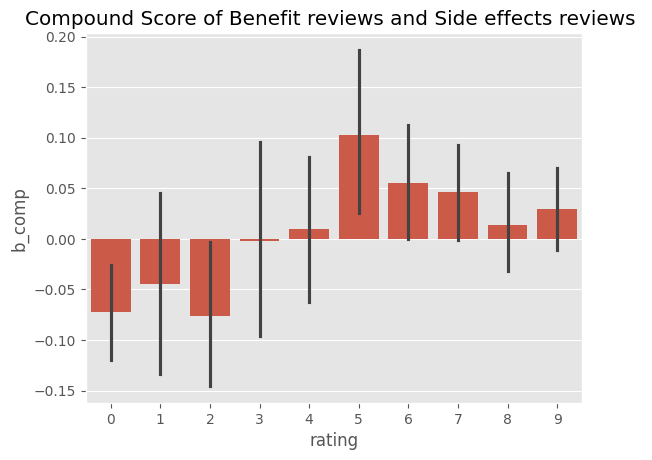

In [ ]:
ax = sns.barplot(data=vadar_df,x='rating', y='b_comp')
ax.set_title('Compound Score of Benefit reviews and Side effects reviews ')
plt.show()

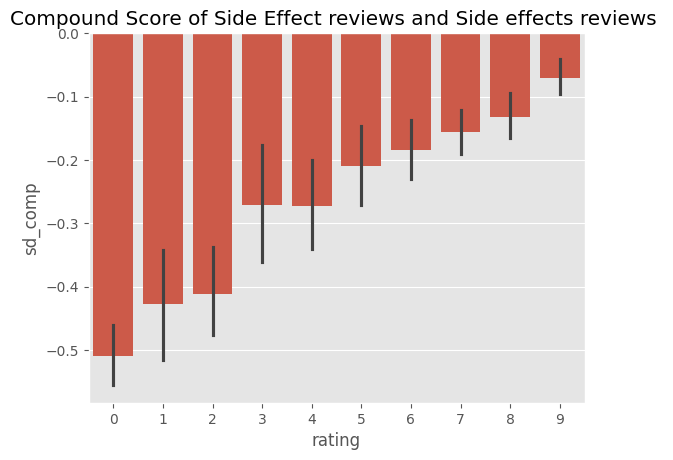

In [ ]:
ax = sns.barplot(data=vadar_df,x='rating', y='sd_comp')
ax.set_title('Compound Score of Side Effect reviews and Side effects reviews ')
plt.show()

<Axes: xlabel='rating', ylabel='sd_pos'>

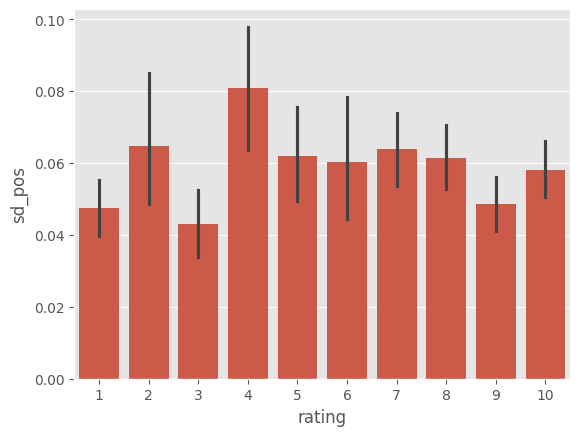

In [ ]:
sns.barplot(data=vadar_df,x='rating', y='sd_pos')

**Bar plot of side effect vadar sentiment analysis of the positive, neutral and negative**

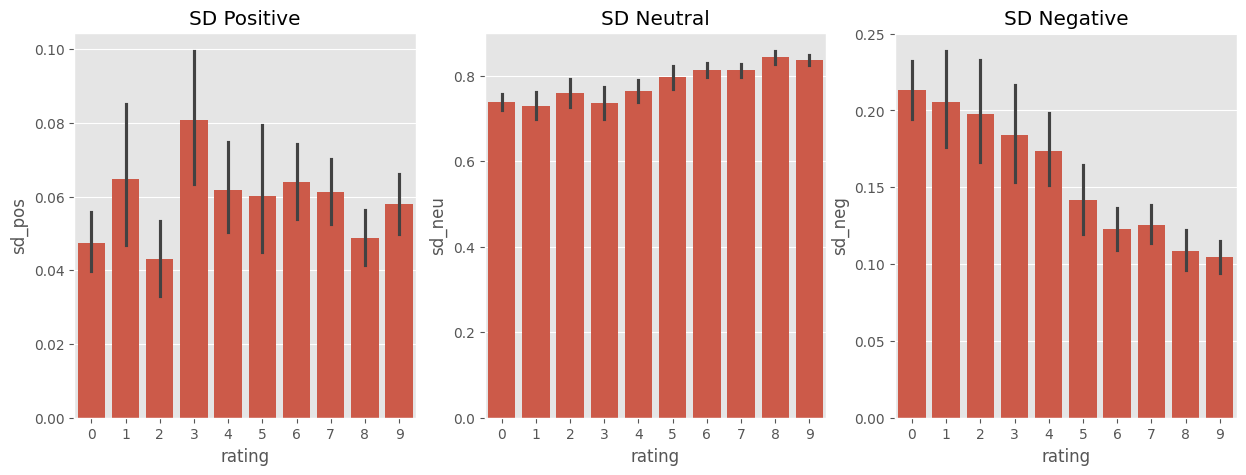

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(15,5))
sns.barplot(data=vadar_df,x='rating', y='sd_pos', ax=axs[0])
sns.barplot(data=vadar_df,x='rating', y='sd_neu', ax=axs[1])
sns.barplot(data=vadar_df,x='rating', y='sd_neg', ax=axs[2])
axs[0].set_title('SD Positive')
axs[1].set_title('SD Neutral')
axs[2].set_title('SD Negative')
plt.show()

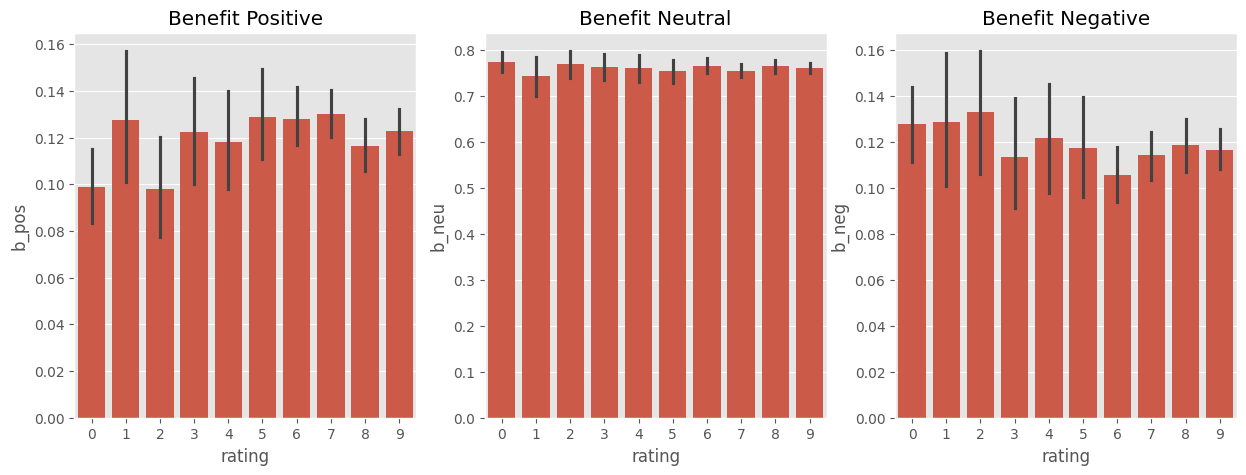

In [ ]:
fig2, axs2 = plt.subplots(1, 3, figsize=(15,5))
sns.barplot(data=vadar_df,x='rating', y='b_pos', ax=axs2[0])
sns.barplot(data=vadar_df,x='rating', y='b_neu', ax=axs2[1])
sns.barplot(data=vadar_df,x='rating', y='b_neg', ax=axs2[2])
axs2[0].set_title('Benefit Positive')
axs2[1].set_title('Benefit Neutral')
axs2[2].set_title('Benefit Negative')
plt.show()

In [ ]:
vadar_df.head()

,id,urlDrugName,rating,label_sentiment,effectiveness_label,sideEffects_label,b_neg,b_neu,b_pos,b_comp,sd_neg,sd_neu,sd_pos,sd_comp
0,0,enalapril,3,0,4,3,0.260,0.740,0.000,-0.7964,0.487,0.513,0.0,-0.9062
1,1,ortho-tri-cyclen,0,0,4,1,0.000,0.838,0.162,0.7003,0.177,0.823,0.0,-0.8223
2,2,ponstel,9,2,4,4,0.068,0.720,0.212,0.8621,0.000,1.000,0.0,0.0000
3,3,prilosec,2,0,1,3,0.047,0.953,0.000,-0.4497,0.101,0.899,0.0,-0.2263
4,4,lyrica,1,0,1,1,0.227,0.697,0.076,-0.5719,0.000,1.000,0.0,0.0000


In [ ]:
test_vadar_df.head()

,id,urlDrugName,rating,label_sentiment,effectiveness_label,sideEffects_label,b_neg,b_neu,b_pos,b_comp,sd_neg,sd_neu,sd_pos,sd_comp
0,0,biaxin,8,2,3,3,0.158,0.842,0.000,-0.4797,0.452,0.548,0.000,-0.5106
1,1,lamictal,8,2,4,3,0.021,0.794,0.185,0.9757,0.051,0.793,0.156,0.9661
2,2,depakene,3,0,2,1,0.063,0.675,0.262,0.9702,0.159,0.779,0.062,-0.8761
3,3,sarafem,9,2,4,4,0.057,0.704,0.239,0.8619,0.000,1.000,0.000,0.0000
4,4,accutane,9,2,4,3,0.074,0.891,0.035,-0.3182,0.126,0.874,0.000,-0.3818


In [ ]:
# df = df.merge(vadar_df, how='left')

In [ ]:
# df.head()

In [ ]:
# df.to_csv('/content/drive/MyDrive/Courses/Ryerson/MRP/Dataset/vader_result.csv', index=False)


In [ ]:
# df.to_excel('/content/drive/MyDrive/Courses/Ryerson/MRP/Dataset/vader_result.xlsx')

# RandomForestClassifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [ ]:
# Define features & labels
# X = vadar_df[['b_neg',	'b_neu',	'b_pos',	'b_comp',	'sd_neg',	'sd_neu',	'sd_pos',	'sd_comp']]
# y = vadar_df['rating']
X = vadar_df[['effectiveness_label', 'sideEffects_label', 'b_comp',	'sd_comp']]
y = vadar_df['label_sentiment']

In [ ]:
X_test = test_vadar_df[['effectiveness_label', 'sideEffects_label', 'b_comp',	'sd_comp']]
y_test = test_vadar_df['label_sentiment']

In [ ]:
# Ignore
# X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
# clf = RandomForestClassifier()
# clf.fit(X_train, y_train)

In [ ]:
# Train RandomForest Model
clf = RandomForestClassifier()
clf.fit(X, y)

RandomForestClassifier()

In [ ]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
def compute_metrics(y_pred, y_true):
  # labels = pred.label_ids
  # preds = pred.predictions.argmax(-1)
  Precision, Recall, f1, _ = precision_recall_fscore_support(y_true, y_pred, average='macro')
  acc = accuracy_score(y_true, y_pred)
  return {
      'Accuracy': acc,
      'F1': f1,
      'Precision': Precision,
      'Recall': Recall
  }

In [ ]:
rating_prediction_rfc = clf.predict(X_test)

In [ ]:
test_vadar_df['rating_prediction_rfc'] = rating_prediction_rfc

In [ ]:
rfc_metrics = compute_metrics(rating_prediction_rfc, y_test)

In [ ]:
test_vadar_df.head()

,id,urlDrugName,rating,label_sentiment,effectiveness_label,sideEffects_label,b_neg,b_neu,b_pos,b_comp,sd_neg,sd_neu,sd_pos,sd_comp,rating_prediction_rfc
0,0,biaxin,8,2,3,3,0.158,0.842,0.000,-0.4797,0.452,0.548,0.000,-0.5106,2
1,1,lamictal,8,2,4,3,0.021,0.794,0.185,0.9757,0.051,0.793,0.156,0.9661,2
2,2,depakene,3,0,2,1,0.063,0.675,0.262,0.9702,0.159,0.779,0.062,-0.8761,0
3,3,sarafem,9,2,4,4,0.057,0.704,0.239,0.8619,0.000,1.000,0.000,0.0000,2
4,4,accutane,9,2,4,3,0.074,0.891,0.035,-0.3182,0.126,0.874,0.000,-0.3818,2


# XGBoost Classification


In [ ]:
from xgboost import XGBClassifier

In [ ]:
xgb_model = XGBClassifier(n_estimators=200, max_depth=6, learning_rate=0.1, objective='multi:softmax', num_class=100, subsample=0.8, gamma=1, reg_lambda=1, random_state=42)



In [ ]:
# fit model
xgb_model.fit(X, y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=1, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None, num_class=100,
              num_parallel_tree=None, ...)

In [ ]:
# make predictions
rating_prediction_xgb = xgb_model.predict(X_test)

In [ ]:
test_vadar_df['rating_prediction_xgb'] = rating_prediction_xgb

In [ ]:
xgb_metrics = compute_metrics(rating_prediction_xgb, y_test)

In [ ]:
xgb_metrics

{'Accuracy': 0.7847490347490348,
 'F1': 0.7380798084384176,
 'Precision': 0.7438172151885064,
 'Recall': 0.7377267319597441}

In [ ]:
xgb_metrics_df = pd.DataFrame(xgb_metrics, index=['XGBClassifier'], columns=['Accuracy', 'F1', 'Precision', 'Recall'])

In [ ]:
xgb_metrics_df.loc['RandomForestClassifier'] = [rfc_metrics['Accuracy'], rfc_metrics['F1'], rfc_metrics['Precision'], rfc_metrics['Recall']]

In [ ]:
# biobert_metric_df = xgb_metrics_df[]
xgb_metrics_df.loc['BioBertModel'] = [tester['Accuracy'], tester['F1'], tester['Precision'], tester['Recall']]
# pd.DataFrame(tester, index=['XGBClassifier'], columns=['Accuracy', 'F1', 'Precision', 'Recall'])

In [ ]:
xgb_metrics_df = xgb_metrics_df.drop(['rfc'])

In [ ]:
xgb_metrics_df

,Accuracy,F1,Precision,Recall
XGBClassifier,0.784749,0.738080,0.743817,0.737727
RandomForestClassifier,0.756757,0.705944,0.708934,0.708873
BioBertModel,0.697876,0.652117,0.664364,0.644424


In [ ]:
xgb_metrics_df.to_excel('xgb_metrics_df.xlsx')

In [ ]:
test_vadar_df.head()

,id,urlDrugName,rating,label_sentiment,effectiveness_label,sideEffects_label,b_neg,b_neu,b_pos,b_comp,sd_neg,sd_neu,sd_pos,sd_comp,rating_prediction_rfc,rating_prediction_xgb
0,0,biaxin,8,2,3,3,0.158,0.842,0.000,-0.4797,0.452,0.548,0.000,-0.5106,2,2
1,1,lamictal,8,2,4,3,0.021,0.794,0.185,0.9757,0.051,0.793,0.156,0.9661,2,2
2,2,depakene,3,0,2,1,0.063,0.675,0.262,0.9702,0.159,0.779,0.062,-0.8761,0,0
3,3,sarafem,9,2,4,4,0.057,0.704,0.239,0.8619,0.000,1.000,0.000,0.0000,2,2
4,4,accutane,9,2,4,3,0.074,0.891,0.035,-0.3182,0.126,0.874,0.000,-0.3818,2,2


In [ ]:
# test_df.head()

,id,url_id,urlDrugName,rating,effectiveness,sideEffects,condition,benefitsReview,sideEffectsReview,commentsReview,effectiveness_label,sideEffects_label,label_sentiment_name,label_sentiment
0,0,1366,biaxin,8,Considerably Effective,Mild Side Effects,sinus infection,the antibiotic may have destroyed bacteria cau...,"some back pain, some nauseau.",Took the antibiotics for 14 days. Sinus infect...,3,3,Positive,2
1,1,3724,lamictal,8,Highly Effective,Mild Side Effects,bipolar disorder,lamictal stabilized my serious mood swings. on...,"drowsiness, a bit of mental numbness. if you t...",Severe mood swings between hypomania and depre...,4,3,Positive,2
2,2,3824,depakene,3,Moderately Effective,Severe Side Effects,bipolar disorder,initial benefits were comparable to the brand ...,"depakene has a very thin coating, which caused...",Depakote was prescribed to me by a Kaiser psyc...,2,1,Negative,0
3,3,969,sarafem,9,Highly Effective,No Side Effects,bi-polar / anxiety,it controlls my mood swings. it helps me think...,i didnt really notice any side effects.,This drug may not be for everyone but its wond...,4,4,Positive,2
4,4,696,accutane,9,Highly Effective,Mild Side Effects,nodular acne,within one week of treatment superficial acne ...,side effects included moderate to severe dry s...,Drug was taken in gelatin tablet at 0.5 mg per...,4,3,Positive,2


In [ ]:
test_vadar_df.head()
test_vadar_df = test_vadar_df.merge(test_df[['id','condition', 'benefitsReview', 'sideEffectsReview']], how='left')

In [ ]:
test_vadar_df.head()

,id,urlDrugName,rating,label_sentiment,effectiveness_label,sideEffects_label,b_neg,b_neu,b_pos,b_comp,sd_neg,sd_neu,sd_pos,sd_comp,rating_prediction_rfc,rating_prediction_xgb,condition,benefitsReview,sideEffectsReview
0,0,biaxin,8,2,3,3,0.158,0.842,0.000,-0.4797,0.452,0.548,0.000,-0.5106,2,2,sinus infection,the antibiotic may have destroyed bacteria cau...,"some back pain, some nauseau."
1,1,lamictal,8,2,4,3,0.021,0.794,0.185,0.9757,0.051,0.793,0.156,0.9661,2,2,bipolar disorder,lamictal stabilized my serious mood swings. on...,"drowsiness, a bit of mental numbness. if you t..."
2,2,depakene,3,0,2,1,0.063,0.675,0.262,0.9702,0.159,0.779,0.062,-0.8761,0,0,bipolar disorder,initial benefits were comparable to the brand ...,"depakene has a very thin coating, which caused..."
3,3,sarafem,9,2,4,4,0.057,0.704,0.239,0.8619,0.000,1.000,0.000,0.0000,2,2,bi-polar / anxiety,it controlls my mood swings. it helps me think...,i didnt really notice any side effects.
4,4,accutane,9,2,4,3,0.074,0.891,0.035,-0.3182,0.126,0.874,0.000,-0.3818,2,2,nodular acne,within one week of treatment superficial acne ...,side effects included moderate to severe dry s...


In [ ]:
test_vadar_df.to_excel('/content/drive/MyDrive/Courses/Ryerson/MRP/Dataset/vader_test_result.xlsx')

In [ ]:
v_df = pd.read_excel('vader_test_result.xlsx')
v_df = v_df.set_index(['id'])


In [ ]:
b_df = pd.read_excel('biobert_predicted_labels.xlsx')
b_df.head()

,Unnamed: 0,combined_text,label_sentiment_name,label_sentiment,predicted_label
0,0,the antibiotic may have destroyed bacteria cau...,Positive,2,2
1,1,lamictal stabilized my serious mood swings. on...,Positive,2,2
2,2,initial benefits were comparable to the brand ...,Negative,0,0
3,3,it controlls my mood swings. it helps me think...,Positive,2,2
4,4,within one week of treatment superficial acne ...,Positive,2,2


In [ ]:
# b_df = b_df.set_index(['id'])
b_df = b_df.rename(columns={'Unnamed: 0': 'id'})
# df = df.reset_index().rename(columns={'index': 'id'})

In [ ]:
b_df.head()
b_df = b_df.set_index(['id'])

In [ ]:
v_df = v_df.merge(b_df, how='left')

In [ ]:
v_df.head()

,Unnamed: 0,urlDrugName,rating,label_sentiment,effectiveness_label,sideEffects_label,b_neg,b_neu,b_pos,b_comp,...,sd_pos,sd_comp,rating_prediction_rfc,rating_prediction_xgb,condition,benefitsReview,sideEffectsReview,combined_text,label_sentiment_name,predicted_label
0,0,biaxin,8,2,3,3,0.158,0.842,0.0,-0.4797,...,0.0,-0.5106,2,2,sinus infection,the antibiotic may have destroyed bacteria cau...,"some back pain, some nauseau.",the antibiotic may have destroyed bacteria cau...,Positive,2
1,0,biaxin,8,2,3,3,0.158,0.842,0.0,-0.4797,...,0.0,-0.5106,2,2,sinus infection,the antibiotic may have destroyed bacteria cau...,"some back pain, some nauseau.",lamictal stabilized my serious mood swings. on...,Positive,2
2,0,biaxin,8,2,3,3,0.158,0.842,0.0,-0.4797,...,0.0,-0.5106,2,2,sinus infection,the antibiotic may have destroyed bacteria cau...,"some back pain, some nauseau.",it controlls my mood swings. it helps me think...,Positive,2
3,0,biaxin,8,2,3,3,0.158,0.842,0.0,-0.4797,...,0.0,-0.5106,2,2,sinus infection,the antibiotic may have destroyed bacteria cau...,"some back pain, some nauseau.",within one week of treatment superficial acne ...,Positive,2
4,0,biaxin,8,2,3,3,0.158,0.842,0.0,-0.4797,...,0.0,-0.5106,2,2,sinus infection,the antibiotic may have destroyed bacteria cau...,"some back pain, some nauseau.",reduction in seizures reduction in seizures re...,Positive,2


In [ ]:
v_df.to_excel('/content/drive/MyDrive/Courses/Ryerson/MRP/Dataset/combined_test_result.xlsx')

Exception ignored in: <function ZipFile.__del__ at 0x79d98f9ae160>
Traceback (most recent call last):
  File "/usr/lib/python3.11/zipfile.py", line 1895, in __del__
    self.close()
  File "/usr/lib/python3.11/zipfile.py", line 1912, in close
    self.fp.seek(self.start_dir)
ValueError: seek of closed file


In [ ]:
benefit_merge_df = b_roberta_score.merge(benefit_review_vader_score, how='left')
benefit_merge_df = benefit_merge_df.merge(df[['id', 'rating',	'effectiveness', 'sideEffects']], how='left')

Merge wih vadar polarity score for both Benefit reviews

In [ ]:
sd_merge_df = sd_roberta_score.merge(side_effect_vader_score, how='left')
sd_merge_df = sd_merge_df.merge(df[['id', 'rating',	'effectiveness', 'sideEffects']], how='left')

# Roberta Pretrained Model

**Roberta Pretrained Model**

Deep learning Model for Context extractions

In [ ]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

Using trained weights from a model i.e f"cardiffnlp/twitter-roberta-base-sentiment

Transfer learning

In [ ]:
model_name = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)


config.json:   0%|          | 0.00/747 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/499M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

**Example**

Example of one text

In [ ]:
example = df['sideEffectsReview'].iloc[350]
example

'when started on treatment: vivid images when eyes closed, trembling, anxiety, feeling of detachedness\r\r\nthroughout treatment: insomnia and disrupted sleep patterns, some dizziness at times, muscular twitching, fidgeting and spasming, weight loss due mostly to fidgeting all the time\r\r\ncoming off treatment: what others have termed "brain shivers", a sort of brain zing which was very disturbing, crying, feeling like the depression was coming back'

Encoding the text

In [ ]:
# word embeddings
encoded_text = tokenizer(example, return_tensors='pt')
# run model on encoded text
output = model(**encoded_text)
# cast tensor into numpy
scores = output[0][0].detach().numpy()

scores = softmax(scores)
# returns negative neutral and positive sentiment
scores

array([0.89847064, 0.09556946, 0.00595995], dtype=float32)

In [ ]:
def polarity_scores_roberta(df, col_name):
  score_dict = {}
  res_pos = []
  res_neu = []
  res_neg = []
  for i, row in tqdm(df.iterrows(), total=len(df)):

    try:
      # word embeddings
      # encoded_text = tokenizer(example, return_tensors='pt')
      encoded_text = tokenizer(row[col_name], return_tensors='pt')
      # run model on encoded text
      output = model(**encoded_text)
      # cast tensor into numpy
      scores = output[0][0].detach().numpy()
      # converts raw scores into probabilities that sum to 1
      scores = softmax(scores)

      res_neg.append(scores[0])
      res_neu.append(scores[1])
      res_pos.append(scores[2])
    except RuntimeError:
      print(f'Broke for id {i}')
      res_neg.append(None)
      res_neu.append(None)
      res_pos.append(None)
  score_dict = {
      col_name + '_neg': res_neg,
      col_name + '_neu': res_neu,
      col_name + '_pos': res_pos
  }
  return score_dict


Generate roberta scores for sideEffectsReview and benefitsReview

In [ ]:
sd_roberta_score_dict = polarity_scores_roberta(df, 'sideEffectsReview')

  0%|          | 0/3107 [00:00<?, ?it/s]

Broke for id 1316


In [ ]:
b_roberta_score_dict = polarity_scores_roberta(df, 'benefitsReview')

  0%|          | 0/3107 [00:00<?, ?it/s]

Convert dicts to dataframe

In [ ]:
sd_roberta_score = pd.DataFrame.from_dict(sd_roberta_score_dict)
# pd.DataFrame.from_dict(data)
sd_roberta_score = sd_roberta_score.reset_index().rename(columns={'index': 'id', })

b_roberta_score = pd.DataFrame.from_dict(b_roberta_score_dict)
b_roberta_score = b_roberta_score.reset_index().rename(columns={'index': 'id'})


In [ ]:
sd_roberta_score.head()

,id,sideEffectsReview_neg,sideEffectsReview_neu,sideEffectsReview_pos
0,0,0.849760,0.141359,0.008881
1,1,0.941418,0.052452,0.006129
2,2,0.808059,0.182691,0.009250
3,3,0.288821,0.621191,0.089988
4,4,0.957151,0.038555,0.004294


In [ ]:
sd_roberta_score.to_csv('./sd_roberta_score.csv', sep='\t', encoding='utf-8', index=False, header=True)

In [ ]:
b_roberta_score.to_csv('./b_roberta_score.csv', sep='\t', encoding='utf-8', index=False, header=True)

Merge with vadar polarity score for both Side Effects

# Visualise analysis

**Visualise analysis**

Side effects

In [ ]:
sns.pairplot(data=sd_merge_df, hue='rating', palette='tab10')
plt.show()

Benefits

In [ ]:
sns.pairplot(data=benefit_merge_df, hue='rating', palette='tab10')
plt.show()

# Fine-tuning BioBERT

Load modules

Used Hugging Face Trainer API for training

Model predicts negative, neutral, or positive sentiment

evaluating accuracy

improving performance

To do

✅ Fine-tuned BioBERT on side effect reviews

✅ Used Hugging Face Trainer API for training

✅ Model predicts negative, neutral, or positive sentiment

evaluating accuracy

improving performance

In [ ]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification

In [ ]:
import torch

In [ ]:
!pip install transformers datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 485.4/485.4 kB 9.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 13.6 MB/s eta 0:00:00


In [ ]:
from torch import cuda
device = 'cuda' if cuda.is_available() else 'cpu'
device

'cpu'

In [ ]:
from transformers import AutoModelForSequenceClassification, AutoTokenizer, Trainer, TrainingArguments
from datasets import load_dataset, Dataset
from sklearn.model_selection import train_test_split

For side effect, use BiobERT.

For side sideEffectsReview and it's label sideEffects

In [ ]:
side_effect_df = df[['sideEffectsReview', 'sideEffects', 'sideEffects_label']]
# side_effect_df['label']
side_effect_df.head()

,sideEffectsReview,sideEffects,sideEffects_label
0,"cough, hypotension , proteinuria, impotence , ...",Mild Side Effects,4
1,"heavy cycle, cramps, hot flashes, fatigue, lon...",Severe Side Effects,2
2,heavier bleeding and clotting than normal.,No Side Effects,5
3,"constipation, dry mouth and some mild dizzines...",Mild Side Effects,4
4,i felt extremely drugged and dopey. could not...,Severe Side Effects,2


In [ ]:
side_effect_df['sideEffectsReview'].apply(len).idxmax()


1316

In [ ]:
len(side_effect_df['sideEffectsReview'][1316])

2551

In [ ]:
# model_name = 'dmis-lab/biobert-base-cased-v1.1'
model_name = 'dmis-lab/biobert-v1.1'
bioBert_tokenizer = AutoTokenizer.from_pretrained(model_name)


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/462 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

In [ ]:
label_names = side_effect_df['sideEffects'].unique()
labels = side_effect_df['sideEffects_label'].unique()

NUM_LABELS = len(labels)
labels
id2label = {i:l for i,l in enumerate(label_names)}
label2id = {l:i for i,l in enumerate(labels)}
id2label

{0: 'Mild Side Effects',
 1: 'Severe Side Effects',
 2: 'No Side Effects',
 3: 'Extremely Severe Side Effects',
 4: 'Moderate Side Effects'}

{0: 'Mild Side Effects',
 1: 'Severe Side Effects',
 2: 'No Side Effects',
 3: 'Extremely Severe Side Effects',
 4: 'Moderate Side Effects'}

In [ ]:

model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels = NUM_LABELS) #id2label=id2label, label2id=label2id)
model.to(device)

pytorch_model.bin:   0%|          | 0.00/433M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at dmis-lab/biobert-v1.1 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(28996, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e

Train, validation split

In [ ]:
size = (3 * side_effect_df.shape[0])//4
train_data = list(side_effect_df['sideEffectsReview'][:size])
val_data = list(side_effect_df['sideEffectsReview'][size:])

train_label = list(side_effect_df['sideEffects_label'][:size])
val_label = list(side_effect_df['sideEffects_label'][:size])

In [ ]:
# SIZE= side_effect_df.shape[0]
# train_texts= list(side_effect_df.sideEffectsReview[:SIZE//2])
# val_texts=   list(side_effect_df.sideEffectsReview[SIZE//2:(3*SIZE)//4 ])
# test_texts=  list(side_effect_df.sideEffectsReview[(3*SIZE)//4:])

# train_labels= list(side_effect_df.sideEffects_label[:SIZE//2])
# val_labels=   list(side_effect_df.sideEffects_label[SIZE//2:(3*SIZE)//4])
# test_labels=  list(side_effect_df.sideEffects_label[(3*SIZE)//4:])

In [ ]:
# t_data = side_effect_df.sideEffectsReview[:SIZE//2]
# t_data
train_data

['cough, hypotension , proteinuria, impotence , renal failure , angina pectoris , tachycardia , eosinophilic pneumonitis, tastes disturbances , anusease anorecia , weakness fatigue insominca weakness',
 "heavy cycle, cramps, hot flashes, fatigue, long lasting cycles. it's only been 5 1/2 months, but i'm concidering changing to a different bc. this is my first time using any kind of bc, unfortunately due to the constant hassel, i'm not happy with the results.",
 'heavier bleeding and clotting than normal.',
 'constipation, dry mouth and some mild dizziness that would go away after medication was stopped for a few days.',
 "i felt extremely drugged and dopey.  could not drive at all while on this med.  also had extreme ankle and feet swelling and couldn't even wear shoes.",
 'low sex drive, before i started taking this drug i was 19 years of age and full of "enthousiasm". now engaged and 21 years old, my sex drive is very low, my wife and i are very unsatisfied. i am also very tired even

Tokenize the data

In [ ]:
# train_encoding = bioBert_tokenizer(train_texts, max_length=128, truncation=True, padding=True)

In [ ]:
# train_encoding = train_data.map(lambda x: bioBert_tokenizer(x, max_length=128, truncation=True, padding=True))
# val_encoding = val_data.map(lambda x: bioBert_tokenizer(x, max_length=128, truncation=True, padding=True))


In [ ]:
train_encoding = bioBert_tokenizer(train_data, truncation=True, padding=True)
val_encoding = bioBert_tokenizer(val_data, truncation=True, padding=True)

In [ ]:
# bioBert_tokenizer.batch_encode_plus()

In [ ]:
# encoded = bioBert_tokenizer.batch_encode_plus(train_data, max_length=128, truncation=True, padding=True, return_tensors='pt')

In [ ]:
# encoded[0]

Encoding(num_tokens=128, attributes=[ids, type_ids, tokens, offsets, attention_mask, special_tokens_mask, overflowing])

In [ ]:
# encoded[1]

Encoding(num_tokens=128, attributes=[ids, type_ids, tokens, offsets, attention_mask, special_tokens_mask, overflowing])

In [ ]:
# input_ids = encoded["input_ids"]
# attention_mask = encoded["attention_mask"]

In [ ]:
# train_tensor = []
# val_tensor = []
# train_label_tensor = []
# val_label_tensor = []
# for index, x in enumerate(train_data):
#   train_tensor.append(bioBert_tokenizer(x, max_length=128, truncation=True, padding=True, return_tensors='pt'))
#   val_tensor.append(bioBert_tokenizer(x, max_length=128, truncation=True, padding=True, return_tensors='pt'))
#   train_label_tensor.append(torch.tensor(train_label[index]))

In [ ]:
# train_encoding
# train_encoding[0].keys()
#

dict_keys(['input_ids', 'token_type_ids', 'attention_mask'])

In [ ]:
# train_encoding[0]

{'input_ids': [101, 21810, 117, 177, 1183, 11439, 5026, 1988, 117, 4592, 19700, 117, 24034, 11860, 3633, 117, 1231, 7050, 4290, 117, 1126, 10533, 1161, 185, 20302, 1548, 117, 27629, 8992, 10542, 1465, 117, 174, 2155, 4559, 27008, 8031, 185, 1673, 1818, 11153, 6620, 117, 18689, 19019, 1116, 117, 1126, 5613, 6530, 1126, 4474, 6052, 117, 11477, 18418, 22233, 18882, 26405, 1161, 11477, 102], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}

In [ ]:
# train_tensor[0]

{'input_ids': tensor([[  101, 21810,   117,   177,  1183, 11439,  5026,  1988,   117,  4592,
         19700,   117, 24034, 11860,  3633,   117,  1231,  7050,  4290,   117,
          1126, 10533,  1161,   185, 20302,  1548,   117, 27629,  8992, 10542,
          1465,   117,   174,  2155,  4559, 27008,  8031,   185,  1673,  1818,
         11153,  6620,   117, 18689, 19019,  1116,   117,  1126,  5613,  6530,
          1126,  4474,  6052,   117, 11477, 18418, 22233, 18882, 26405,  1161,
         11477,   102]]), 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])}

In [ ]:
# train_encoding.items()
# for key in train_encoding[0]:
#   print(key)
#   # print(val)

input_ids
token_type_ids
attention_mask


In [ ]:
from torch.utils.data import Dataset
class MyNewDataset(Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels
    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item
    def __len__(self):
        return len(self.labels)


In [ ]:
train_dataset = MyNewDataset(train_encoding, train_label)
val_dataset = MyNewDataset(val_encoding, val_label)

In [ ]:
# from torch.utils.data import Dataset
# class MyDataset(Dataset):
#   def __init__(self, encoding, labels):
#     self.encodings = encoding
#     self.labels = labels

#   def __getitem__(self, idx):
#     # item = { key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
#     item = {}
#     for key, val in self.encodings.items():
#       # key: torch.tensor(val[idx])
#       print(idx)
#       value = val[idx]
#       item[key] = torch.tensor(value)

#     item['labels'] = torch.tensor(self.labels[idx])
#     return item

#   def __len__(self):
#     return len(self.labels)

In [ ]:
# train_dataset = MyDataset(train_encoding, train_label)
# val_dataset = MyDataset(val_encoding, val_label)

In [ ]:
# train_dataset

In [ ]:
# def encode_data(tokenizer, texts, max_length):
#   encoded = tokenizer.batch_encode_plus(texts, max_length=max_length, truncation=True, padding=True, return_tensors='pt')
#   return encoded["input_ids"], encoded["attention_mask"]


In [ ]:
# input_ids, attention_mask = encode_data(bioBert_tokenizer, train_texts, max_length=128)

Train with Trainer class

In [ ]:
# training_args = TrainingArguments(
#     output_dir='./SDBIOBERTMODEL',
#     do_train=True,
#     do_eval=True,
#     num_train_epochs=3,
#     per_device_train_batch_size=16,
#     per_device_eval_batch_size=32,
#     warmup_steps=100,
#     weight_decay=0.01,
#     logging_strategy='epoch',
#     logging_dir='./multi-class-logs',
#     logging_steps=50,
#     eval_strategy='epoch',
#     eval_steps=50,
#     save_strategy='epoch',
#     fp16=True,
#     load_best_model_at_end=True
# )

training_args = TrainingArguments(
    output_dir='./SDBIOBERTMODEL',
    do_train=True,
    do_eval=True,
    num_train_epochs=3,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=32,
    warmup_steps=100,
    weight_decay=0.01,
    logging_strategy='steps',
    logging_dir='./multi-class-logs',
    logging_steps=50,
    eval_strategy='steps',
    eval_steps=50,
    save_strategy='steps',
    fp16=True,
    load_best_model_at_end=True
)

Compute matrics
attempt with Macro-averaging. Macro Averaging computes the average score of Precision, recall, and F1 class. It gives equal weights to each class

In [ ]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
def compute_metrics(pred):
  labels = pred.label_ids
  preds = pred.predictions.argmax(-1)
  Precision, Recall, f1, _ = precision_recall_fscore_support(labels, preds, average='macro')
  acc = accuracy_score(labels, preds)
  return {
      'Accuracy': acc,
      'F1': f1,
      'Precision': Precision,
      'Recall': Recall
  }


In [ ]:
trainer = Trainer(
    model=model,
    args=training_args,
    # train_dataset=train_dataset,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    compute_metrics=compute_metrics
)

In [ ]:
results=trainer.train()

RuntimeError: CUDA error: device-side assert triggered
CUDA kernel errors might be asynchronously reported at some other API call, so the stacktrace below might be incorrect.
For debugging consider passing CUDA_LAUNCH_BLOCKING=1
Compile with `TORCH_USE_CUDA_DSA` to enable device-side assertions.
